### 1. Use yeast dataset from UCI http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data
### 2. Remove the first column and use the last column as the target
### 3. Only leave CYT and VAC classes
### 4. Replace [0.3, 0.5, 0.7] in feature 2 to null
### 5. Replace [0.26, 0.36, 0.64] in feature 3 to null
### 6. Split the data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from IPython.display import display

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data', header=None, delim_whitespace=True)
df

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [3]:
target = 9
df.drop(0, axis=1, inplace=True)

In [4]:
df = df[df[target].isin(['CYT', 'VAC'])]
df.head(50)

,1,2,3,4,5,6,7,8,9
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
9,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT
12,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,CYT
15,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,CYT
16,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,CYT
20,0.45,0.40,0.50,0.16,0.5,0.0,0.50,0.22,CYT
21,0.43,0.44,0.48,0.22,0.5,0.0,0.51,0.22,CYT
22,0.73,0.63,0.42,0.30,0.5,0.0,0.49,0.22,CYT
23,0.43,0.53,0.52,0.13,0.5,0.0,0.55,0.22,CYT
24,0.46,0.53,0.52,0.15,0.5,0.0,0.58,0.22,CYT


In [5]:
df[2] = df[2].replace([0.3, 0.5, 0.7], np.nan)
df[3] = df[3].replace([0.26, 0.36, 0.64], np.nan)

df[2]

<ipython-input-5-2d0c3bee9743>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[2] = df[2].replace([0.3, 0.5, 0.7], np.nan)
<ipython-input-5-2d0c3bee9743>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[3] = df[3].replace([0.26, 0.36, 0.64], np.nan)


5       0.40
9       0.39
12      0.42
15      0.44
16      0.39
        ... 
1475     NaN
1476    0.48
1477    0.32
1478    0.40
1483    0.54
Name: 2, Length: 493, dtype: float64

In [6]:
y = df[target] == 'CYT'
df[target]

5       CYT
9       CYT
12      CYT
15      CYT
16      CYT
       ... 
1475    CYT
1476    CYT
1477    CYT
1478    CYT
1483    CYT
Name: 9, Length: 493, dtype: object

In [7]:
features = [1,2,3,4,5,6,7,8]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.33, random_state=1)

In [9]:
y_test

1105    True
321     True
517     True
733     True
1021    True
        ... 
1307    True
1121    True
1459    True
934     True
365     True
Name: 9, Length: 163, dtype: bool

In [10]:
y_train

244     True
1326    True
821     True
68      True
277     True
        ... 
931     True
213     True
1237    True
848     True
106     True
Name: 9, Length: 330, dtype: bool

### 7. Impute the data (or not, it's your call)

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [12]:
X_train_imputed

array([[0.2 , 0.26, 0.52, ..., 0.  , 0.53, 0.44],
       [0.47, 0.59, 0.56, ..., 0.  , 0.5 , 0.22],
       [0.55, 0.63, 0.54, ..., 0.  , 0.45, 0.27],
       ...,
       [0.59, 0.48, 0.49, ..., 0.  , 0.52, 0.22],
       [0.48, 0.56, 0.49, ..., 0.  , 0.5 , 0.22],
       [0.42, 0.35, 0.54, ..., 0.  , 0.56, 0.22]])

In [13]:
X_test_imputed

array([[0.37, 0.55, 0.52, ..., 0.  , 0.42, 0.8 ],
       [0.35, 0.36, 0.57, ..., 0.  , 0.52, 0.22],
       [0.52, 0.48, 0.58, ..., 0.  , 0.48, 0.22],
       ...,
       [0.41, 0.45, 0.46, ..., 0.  , 0.5 , 0.7 ],
       [0.61, 0.38, 0.57, ..., 0.  , 0.44, 0.21],
       [0.59, 0.43, 0.52, ..., 0.  , 0.55, 0.27]])

In [14]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train_imputed, y_train)
model.predict(X_test_imputed)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### 8. Build a outlier detection model to classify VAC from CYT, i.e. 0 from 1

In [15]:
# from sklearn.ensemble import IsolationForest
# from numpy import quantile, where, random

In [16]:
from sklearn.cluster import DBSCAN
# from sklearn.datasets import make_blobs
from numpy import random, where, quantile

# random.seed(3)
# x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(20, 5))

# # We'll check the dataset by visualizing it in a plot.

# plt.scatter(x[:,0], x[:,1])
# plt.show()

In [17]:
dbscan = DBSCAN(eps = 0.28, min_samples = 20)
print(dbscan) 

DBSCAN(eps=0.28, min_samples=20)


In [18]:
#  We'll fit the model with x dataset and get the prediction data with the fit_predict() method.

y_pred = dbscan.fit_predict(X_train_imputed)
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [19]:
# the negative outputs as the outliers.
anom_index = where(y_pred == -1)
values = X_train_imputed[anom_index]

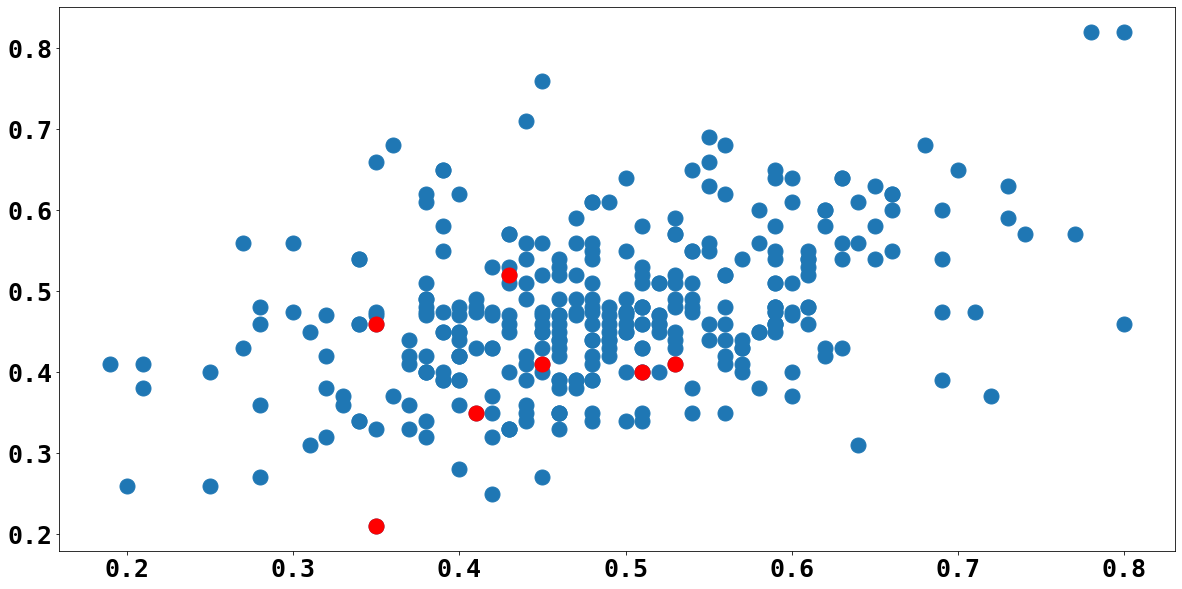

In [20]:
plt.scatter(X_train_imputed[:,0], X_train_imputed[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

### 9. Build a classifer using sample augmentation techniques to flassify VAC from CYT, i.e. 0 from 1

In [21]:
import numpy as np
import pandas as pd

In [22]:
color = ['blue','orange']
df_train = df[df[target].isin(['CYT', 'VAC'])]

In [23]:
target_count = df_train[target].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 463
Class 1: 30
Proportion: 15.43 : 1


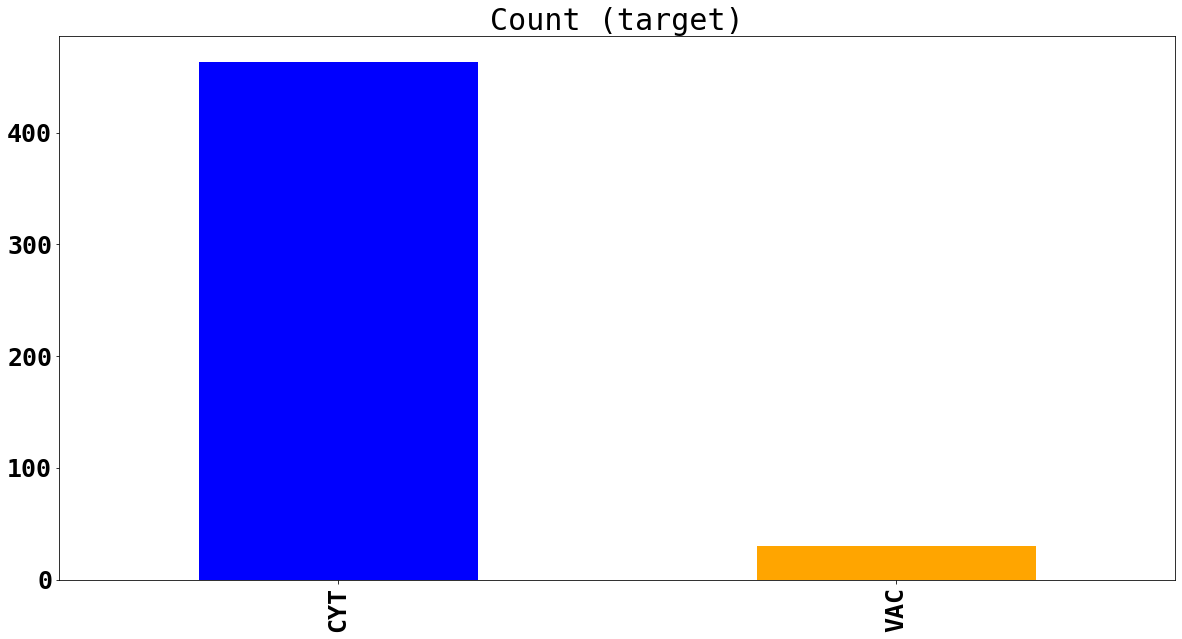

In [24]:
target_count.plot(kind='bar', title='Count (target)', color = color);

In [25]:
# Class count
count_class_0, count_class_1 = df_train[target].value_counts()

# Divide by class
df_class_0 = df_train[df_train[target] == 0]
df_class_1 = df_train[df_train[target] == 1]

In [26]:
#Random under-sampling and over-sampling with imbalanced-learn

!pip install imbalanced-learn

In [27]:
from sklearn.datasets import make_classification
import imblearn

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

In [28]:
def plot_2d_space(X_train_imputed, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X_train_imputed[y==l, 0],
            X_train_imputed[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [29]:
def plot_2d_space(X_train_imputed, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X_train_imputed[y==l, 0],
            X_train_imputed[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

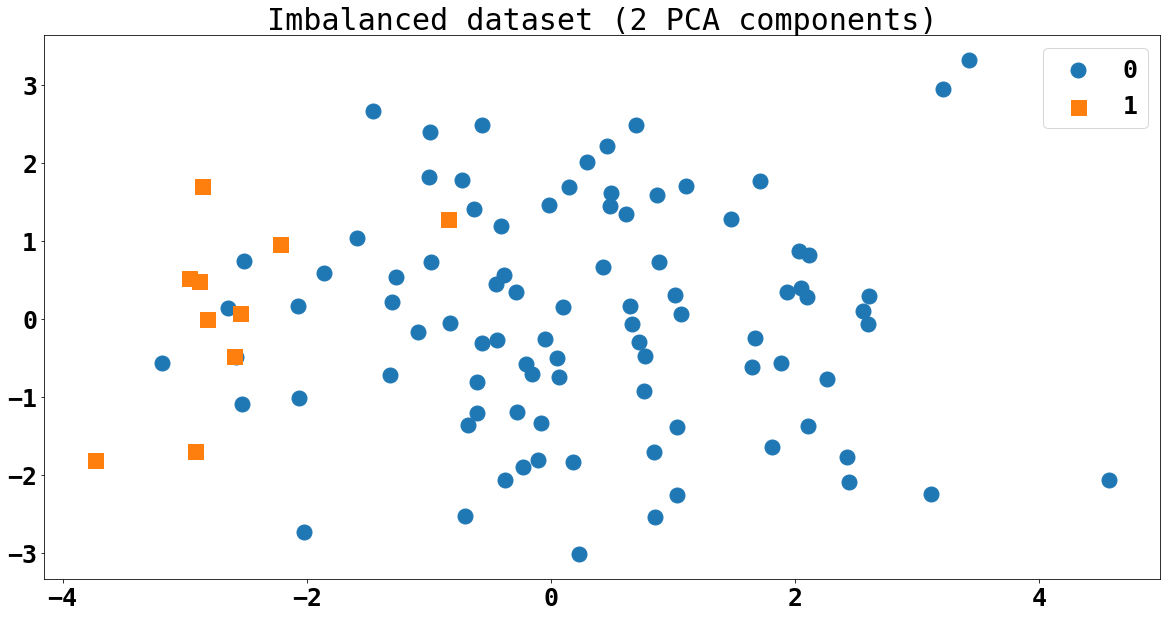

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xpca = pca.fit_transform(X)

plot_2d_space(Xpca, y, 'Imbalanced dataset (2 PCA components)')

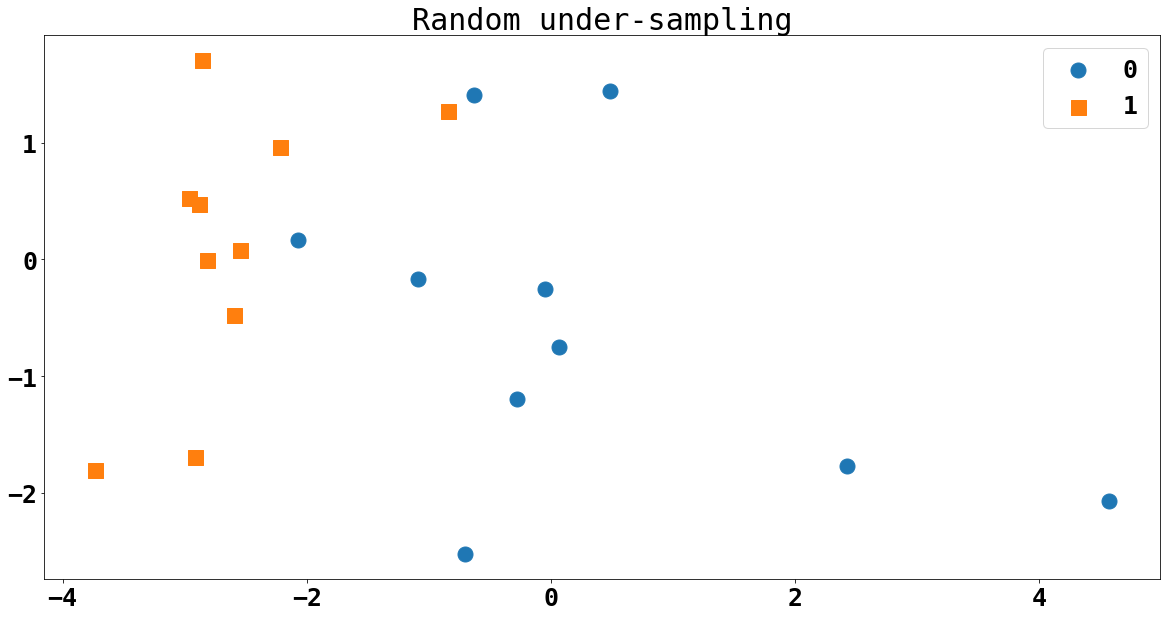

In [31]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(Xpca, y)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

80 new random picked points


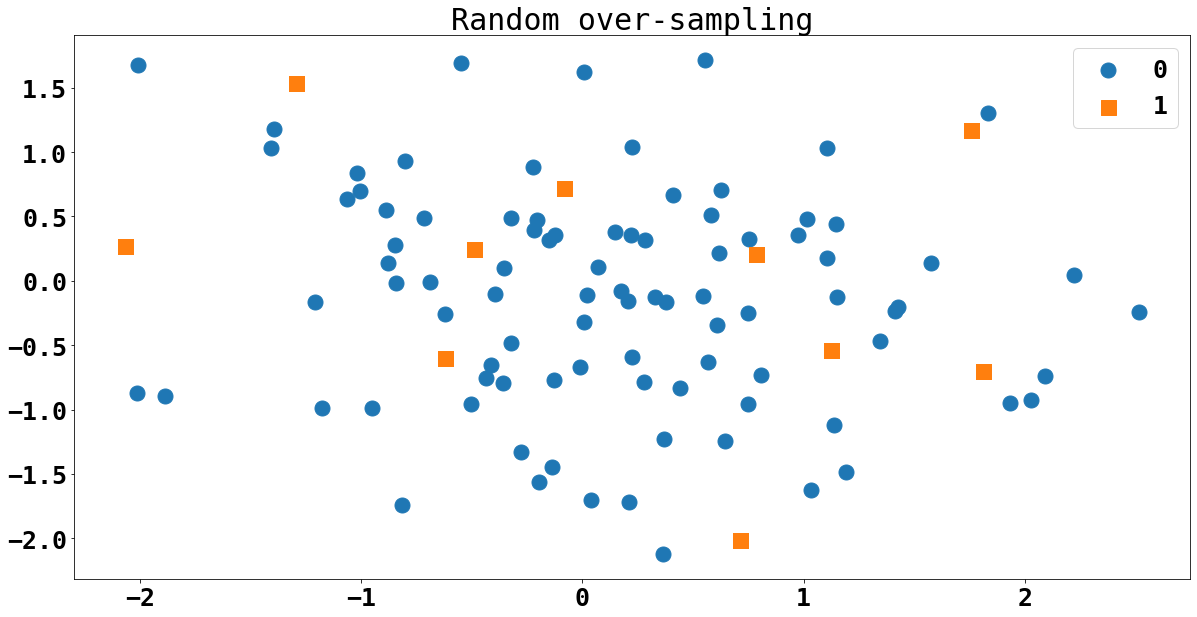

In [32]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

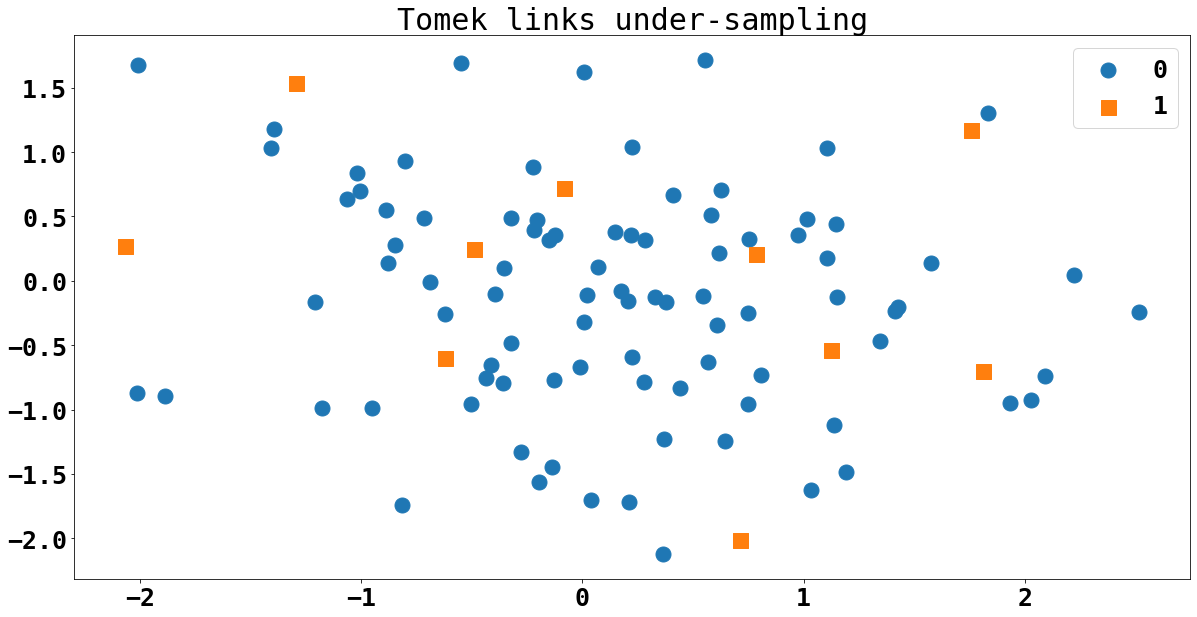

In [33]:
#Other method #1: Under-sampling: Tomek links

from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_sample(X, y)
plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

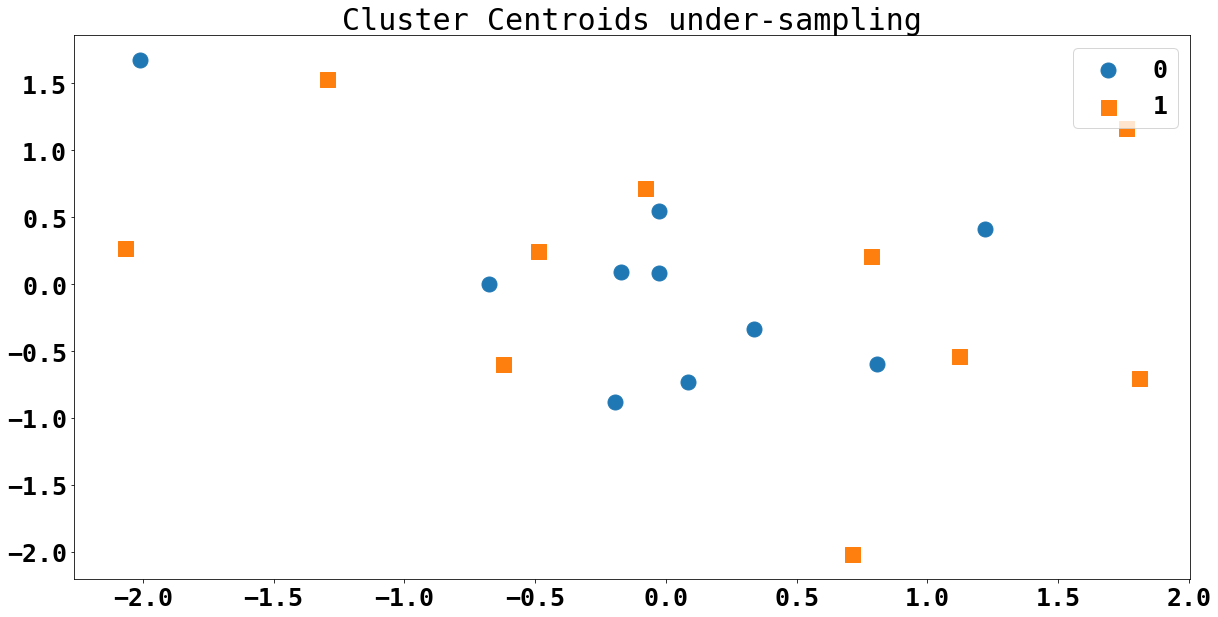

In [34]:
#Other method #2: Under-sampling _ Cluster Centroids

from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy ={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

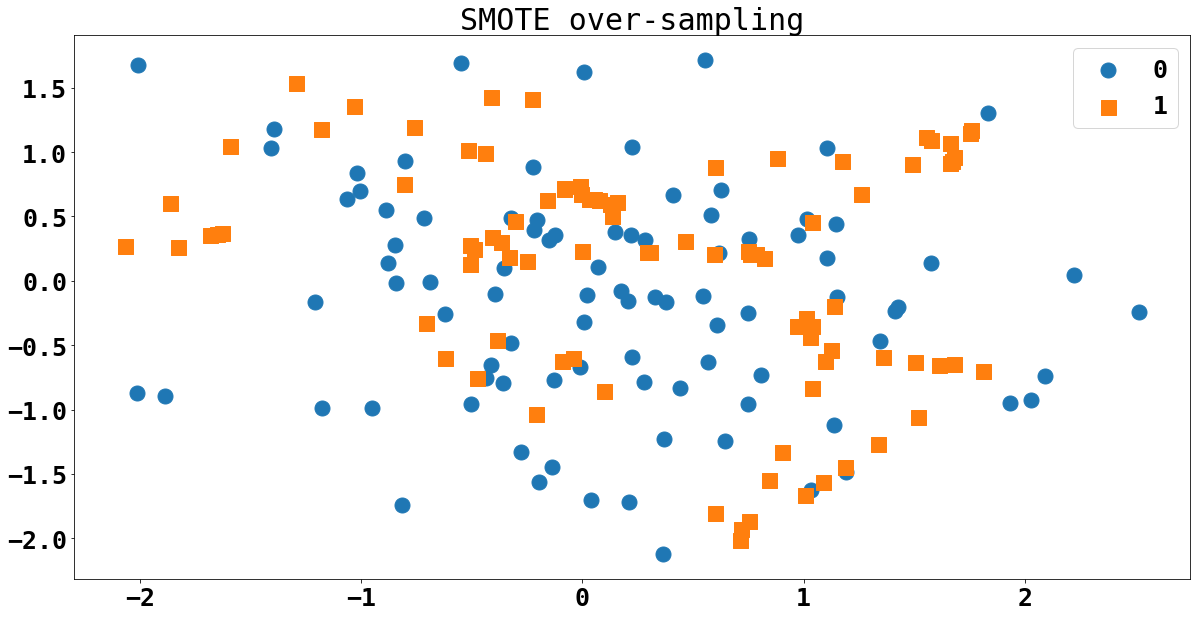

In [35]:
#Other method #4: Over-sampling: SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

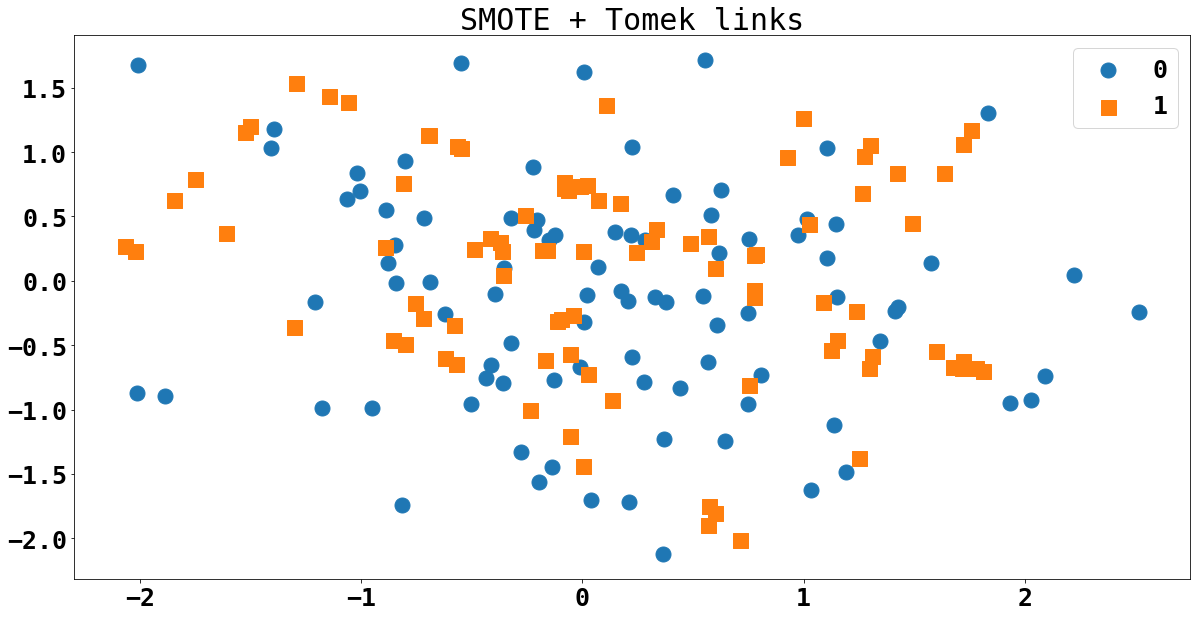

In [36]:
#Other method #4: Over-sampling followed by under-sampling

from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

### 10. Try different methods and hyper paramters

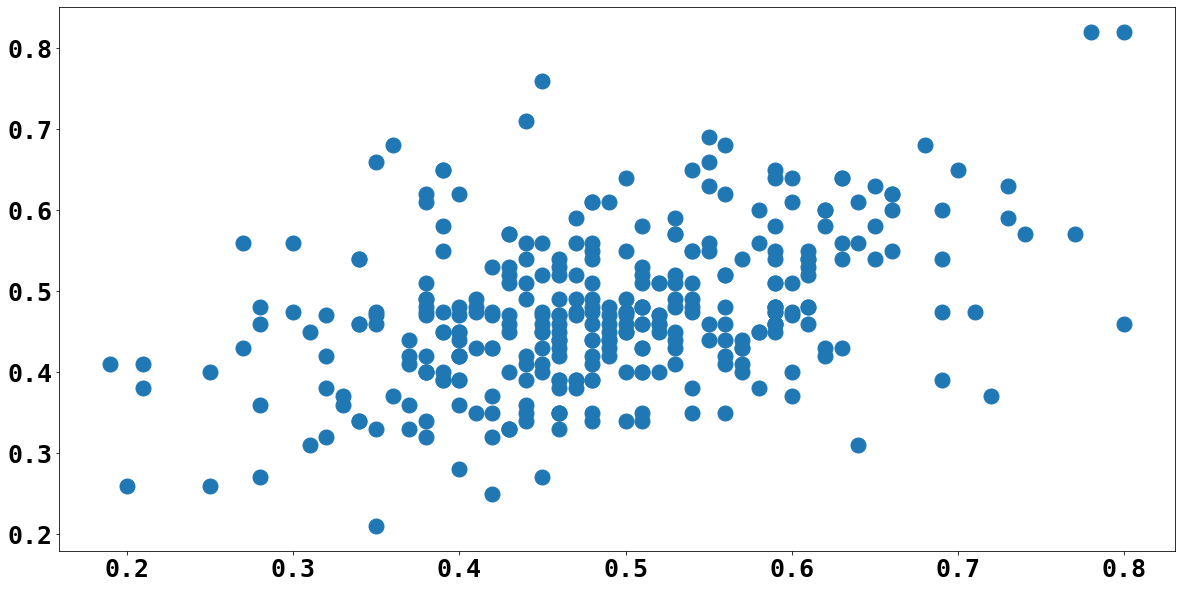

In [37]:
#Local Outlier Factor Method

from sklearn.neighbors import LocalOutlierFactor

plt.scatter(X_train_imputed[:,0], X_train_imputed[:,1])
plt.show()

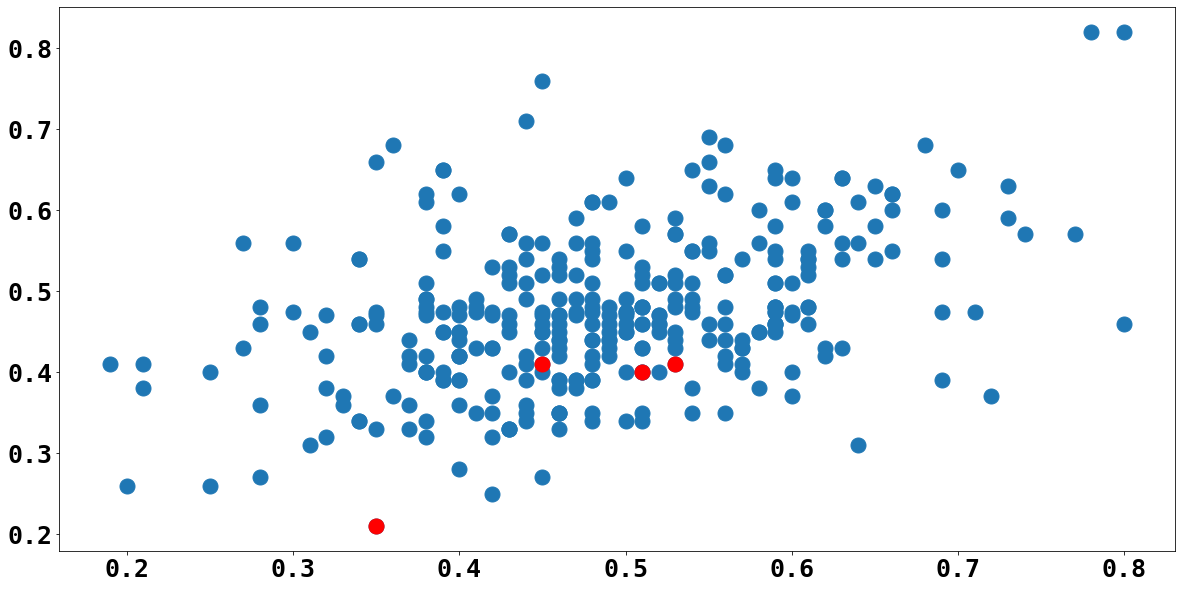

In [38]:
lof = LocalOutlierFactor(n_neighbors=100, contamination=.01)

y_pred = lof.fit_predict(X_train_imputed)

lofs_index = where(y_pred==-1)
values = X_train_imputed[lofs_index]

plt.scatter(X_train_imputed[:,0], X_train_imputed[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

In [39]:
#Isolation Forest Method

from sklearn.ensemble import IsolationForest
from numpy import quantile, where, random

# plt.scatter(X_train_imputed[:,0], X_train_imputed[:,1])
# plt.show()

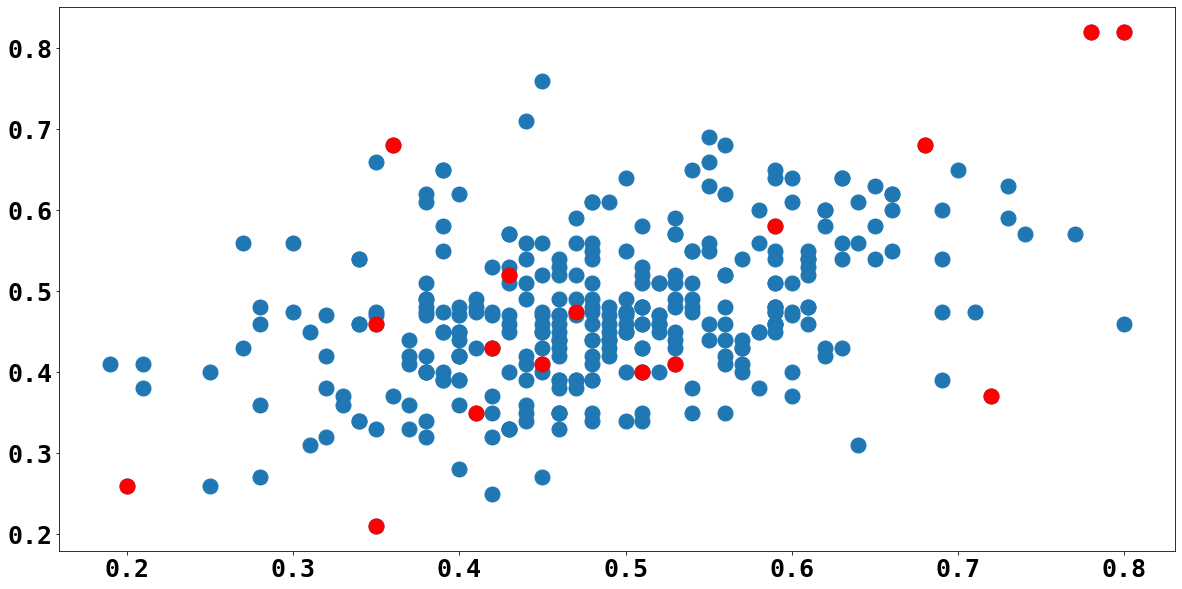

In [40]:
# The model by using the IsolationForest class of Scikit-learn API. 
# We'll set estimators number and contamination value in arguments of the class.

iforest = IsolationForest(n_estimators=300, contamination=.05) # contamination refers to the portion of outliers in the data
pred = iforest.fit_predict(X_train_imputed)
anom_index = where(pred==-1)
values = X_train_imputed[anom_index]

plt.scatter(X_train_imputed[:,0], X_train_imputed[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

### 11. Report perfromance using F-1 score

In [41]:
X = df.iloc[:,:8].values
X

array([[0.51, 0.4 , 0.56, ..., 0.5 , 0.49, 0.22],
       [0.4 , 0.39, 0.6 , ..., 0.  , 0.58, 0.3 ],
       [0.4 , 0.42, 0.57, ..., 0.  , 0.53, 0.25],
       ...,
       [0.38, 0.32,  nan, ..., 0.  , 0.44, 0.11],
       [0.38, 0.4 , 0.66, ..., 0.  , 0.43, 0.11],
       [0.65, 0.54, 0.54, ..., 0.  , 0.53, 0.22]])

In [42]:
y = df.iloc[:,8].values

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# df_encoded = pd.DataFrame()
le.fit(y)

y = le.fit_transform(df.iloc[:,8])
import collections
from collections import Counter

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
import collections
from collections import Counter


print(Counter(y))

Counter({0: 463, 1: 30})


In [45]:
print(Counter(y_train))

Counter({True: 309, False: 21})


In [46]:
print(Counter(y_pred))

Counter({1: 326, -1: 4})


In [47]:
# z =  y.copy()
# my_dict = {'CYT':0, 'VAC':-1}
# z = [my_dict[zi] for zi in z]
# print(Counter(z))

In [48]:
from sklearn.metrics import f1_score

# print("f1 score most frequent: {:.2f}".format(
# f1_score(y_train, y)))

f1_score(y_pred, y_train, average = None)

array([0.        , 0.        , 0.96062992])